<function matplotlib.pyplot.show(close=None, block=None)>

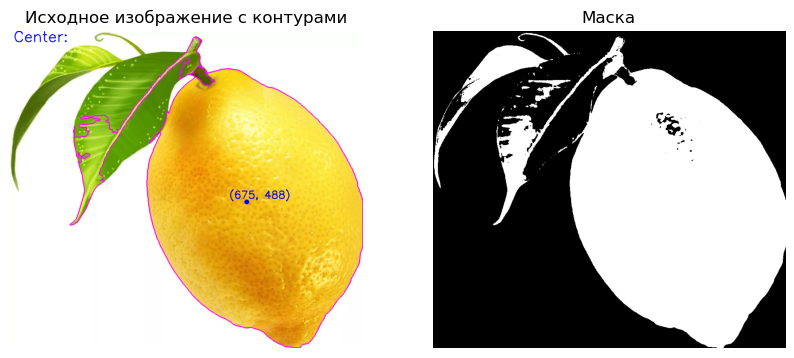

In [29]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

frame = cv2.imread('lemon.jpg') #Загрузка картинки

frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #Перевод картинки в HSV

low_yellow = np.array([15, 100, 110]) #Пороги для желтого цвета
high_yellow = np.array([40, 255, 255])

mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)

contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
count = 0

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 30000:
        count += 1 # все контуры, цвет (255,0,255), толщина 2,
        cv2.drawContours(frame, contour, -1, (255,0,255), 2)
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Проверка, чтобы избежать деления на ноль
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(frame, (cX, cY), 7, (255, 0, 0), -1)  # Красный цвет для центра
            cv2.putText(frame, f"({cX}, {cY})", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.putText(frame, f"Center: ", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (255, 0, 0), 2)
            
plt.figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.title('Исходное изображение с контурами')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show